In [ ]:
! pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np

df= yf.download (['ETH-USD', 'VIST', 'TSLA' , 'GLD' , 'LQD', 'TLT','ENZL','QQQM','XLP','BTC-USD','BNB-USD', 'SQQQ'] , start = '2020-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)]
retornos = np.log((df/df.shift(1)).dropna())

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  12 of 12 completed


In [ ]:
datosTickers = []
for ticker in df.columns:
    d = {}
    d['ticker'] = ticker
    d['retorno'] = retornos[ticker].mean() * 252
    d['volatilidad'] = retornos[ticker].std() * (252**0.5)
    d['sharpe'] = d['retorno'] / d['volatilidad']
    datosTickers.append(d)
    
    
datosTickers = pd.DataFrame(datosTickers).set_index('ticker')
datosTickers

,retorno,volatilidad,sharpe
ticker,,,
BNB-USD,1.422463,1.107005,1.284965
BTC-USD,0.571755,0.657409,0.869710
ENZL,0.017817,0.181726,0.098041
ETH-USD,0.434508,0.837633,0.518734
GLD,0.007712,0.139958,0.055105
LQD,-0.055147,0.075731,-0.728195
QQQM,0.067017,0.229544,0.291959
SQQQ,-0.510686,0.688434,-0.741807
TLT,-0.141413,0.148296,-0.953586


In [ ]:
q = 500
retornos = np.log((df/df.shift(1)).dropna())
carteras = [] 

for i in range(q):
    pond = np.array(np.random.random(len(df.columns)))
    pond = pond/np.sum(pond)
    r={}
    r['retorno'] = np.sum( (retornos.mean() * pond * 252))
    r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
    r['sharpe'] = r['retorno'] / r['volatilidad'] 
    r['pesos'] = pond.round(4)
    carteras.append(r)

carteras = pd.DataFrame(carteras)
carteras

,retorno,volatilidad,sharpe,pesos
0,0.163303,0.166360,0.981622,"[0.0443, 0.0702, 0.113, 0.0713, 0.0961, 0.099,..."
1,0.243274,0.200727,1.211966,"[0.1071, 0.0255, 0.0399, 0.0574, 0.1026, 0.015..."
2,0.181321,0.194158,0.933882,"[0.1443, 0.0089, 0.023, 0.0368, 0.078, 0.1941,..."
3,0.096226,0.142751,0.674079,"[0.0123, 0.031, 0.1191, 0.0529, 0.077, 0.0553,..."
4,0.148284,0.168629,0.879350,"[0.0263, 0.0771, 0.1192, 0.0288, 0.0265, 0.035..."
...,...,...,...,...
495,0.136662,0.143241,0.954068,"[0.0374, 0.0984, 0.1226, 0.0314, 0.0806, 0.113..."
496,0.159409,0.188156,0.847215,"[0.0428, 0.1155, 0.0919, 0.0025, 0.1292, 0.023..."
497,0.239325,0.240657,0.994464,"[0.1028, 0.0681, 0.0662, 0.1164, 0.1306, 0.139..."
498,0.150200,0.189536,0.792463,"[0.0093, 0.1783, 0.1413, 0.0358, 0.1013, 0.050..."


In [ ]:
#PONDERACION OPTIMA DEL PORTFOLIO
optimo = carteras.loc[carteras.sharpe.idxmax()]
mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']

datosTickers['ponderacion_optima'] = mejor_port
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
BNB-USD,1.422463,1.107005,1.284965,0.0875
BTC-USD,0.571755,0.657409,0.869710,0.0894
ENZL,0.017817,0.181726,0.098041,0.1031
ETH-USD,0.434508,0.837633,0.518734,0.0049
GLD,0.007712,0.139958,0.055105,0.0203
LQD,-0.055147,0.075731,-0.728195,0.1289
QQQM,0.067017,0.229544,0.291959,0.2053
SQQQ,-0.510686,0.688434,-0.741807,0.0441
TLT,-0.141413,0.148296,-0.953586,0.0300


In [ ]:
optimo


retorno                                                 0.309749
volatilidad                                             0.217874
sharpe                                                  1.421691
pesos          [0.0875, 0.0894, 0.1031, 0.0049, 0.0203, 0.128...
Name: 247, dtype: object

In [ ]:
mejor_port


array([0.0875, 0.0894, 0.1031, 0.0049, 0.0203, 0.1289, 0.2053, 0.0441,
       0.03  , 0.0572, 0.2074, 0.0219])

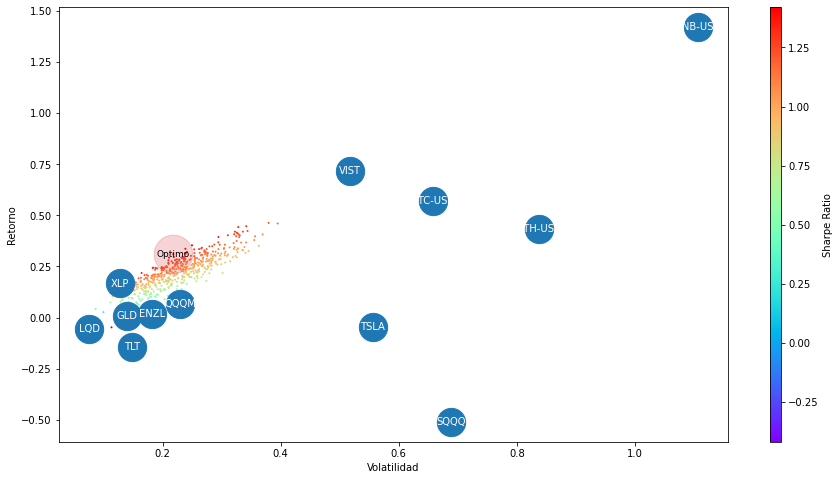

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
plt.colorbar(label='Sharpe Ratio', aspect=40)
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 

for ticker in df.columns:
    vol = datosTickers.loc[ticker,'volatilidad'] 
    ret = datosTickers.loc[ticker,'retorno'] 
    plt.scatter(vol, ret,  c='tab:blue', s=800) 
    plt.text(vol, ret, ticker, c='w', ha='center', va='center')

In [ ]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt

def markowitz(data, q=1000):
    retornos = np.log((data/data.shift(1)).dropna())
    carteras, datosTickers = [] , []
    
    for i in range(q):
        pond = np.array(np.random.random(len(data.columns)))
        pond = pond/np.sum(pond)
        r={}
        r['retorno'] = np.sum( (retornos.mean() * pond * 252))
        r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
        r['sharpe'] = r['retorno'] / r['volatilidad'] 
        r['pesos'] =  pond.round(4)
        carteras.append(r)
    
    for ticker in data.columns:
        d = {}
        d['ticker'] = ticker
        d['retorno'] = retornos[ticker].mean() * 252
        d['volatilidad'] = retornos[ticker].std() * (252**0.5)
        d['sharpe'] = d['retorno'] / d['volatilidad']
        datosTickers.append(d)

    datosTickers = pd.DataFrame(datosTickers).set_index('ticker')    
    carteras = pd.DataFrame(carteras)

    optimo = carteras.loc[carteras.sharpe.idxmax()]
    mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']
    datosTickers['ponderacion_optima'] = mejor_port

    plt.figure(figsize=(6,5))
    plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
    plt.colorbar(label='Sharpe Ratio', aspect=40)
    plt.xlabel('Volatilidad')
    plt.ylabel('Retorno')
    plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
    plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 
       
    for ticker in data.columns:
        vol = datosTickers.loc[ticker,'volatilidad'] 
        ret = datosTickers.loc[ticker,'retorno'] 
        plt.scatter(vol, ret,  c='tab:blue', s=800) 
        plt.text(vol, ret, ticker, c='w', ha='center', va='center') 
    
    return(datosTickers.round(3), optimo)

[*********************100%***********************]  12 of 12 completed
         retorno  volatilidad  sharpe  ponderacion_optima
ticker                                                   
BNB-USD    6.240        0.678   9.198               0.018
BTC-USD    0.125        0.402   0.312               0.059
ENZL      -0.337        0.165  -2.042               0.045
GLD        0.867        0.165   5.263               0.015
LQD        0.870        0.067  12.906               0.178
QQQM       1.798        0.087  20.589               0.142
SPY        1.152        0.018  64.246               0.122
SQQQ      -5.473        0.245 -22.338               0.019
TLT        1.219        0.175   6.972               0.160
TSLA       0.700        0.445   1.572               0.039
VIST      -4.868        0.408 -11.932               0.012
XLP        1.431        0.055  25.934               0.191

Portafolio Optimo:
retorno                                                 1.005708
volatilidad                     

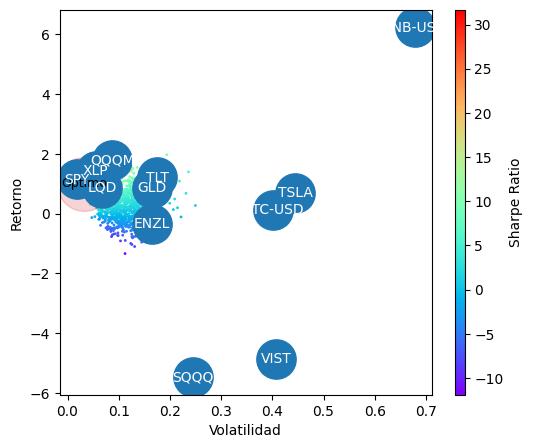

In [ ]:
plt.style.use('default')
df = yf.download(['SPY', 'VIST', 'TSLA' , 'GLD' , 'LQD', 'TLT','ENZL','QQQM','XLP','BTC-USD','BNB-USD', 'SQQQ'] , start = '2021-11-01', end= '2021-11-09')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
pond, optimo = markowitz(df, q=1000)
print(pond, '\n\nPortafolio Optimo:\n',optimo, sep='')
